## Introdução

Estaremos usando o [Reconhecimento de atividade humana com smartphones](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA -SkillsNetwork-Channel-SkillsNetworkCoursesIBMML241ENSkillsNetwork31576874-2022-01-01), que foi construído a partir das gravações dos participantes do estudo que carregavam um smartphone com um sensor inercial incorporado enquanto realizavam atividades da vida diária (AVD). O objetivo é classificar as atividades realizadas pelos participantes em uma das seis categorias a seguir: andar, subir escadas, descer escadas, sentar, ficar de pé e deitar.

As seguintes informações são fornecidas para cada registro no conjunto de dados:

* Aceleração triaxial do acelerômetro (aceleração total) e a aceleração corporal estimada
* Velocidade angular triaxial do giroscópio
* Um vetor de 561 características com variáveis ​​de domínio de tempo e frequência
* O rótulo da atividade

Mais informações sobre os recursos estão disponíveis no site vinculado acima.

In [3]:
#import warning para ignorar avisos sobre o cod
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

#importo as libs
import seaborn as sns
import pandas as pd
import numpy as np


# Questão 1

Importe os dados e faça o seguinte:

* Examine os tipos de dados--há muitas colunas, então pode ser sábio usar contagens de valor.
* Determine se os valores de ponto flutuante precisam ser dimensionados.
* Determine o detalhamento de cada atividade.
* Codifique o rótulo da atividade como um número inteiro.

In [2]:
### importo os dados
data = pd.read_csv("Human_Activity_Recognition_Using_Smartphones_Data.csv", sep=',')
data

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10294,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784,WALKING_UPSTAIRS
10295,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412,WALKING_UPSTAIRS
10296,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.118854,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184,WALKING_UPSTAIRS
10297,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.205445,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563,WALKING_UPSTAIRS


In [4]:
#contou os dados que tem no dataset
data.dtypes.value_counts()

float64    561
object       1
dtype: int64

In [5]:
#obtendo as últimas linhas
data.dtypes.tail()

angle(tBodyGyroJerkMean,gravityMean)    float64
angle(X,gravityMean)                    float64
angle(Y,gravityMean)                    float64
angle(Z,gravityMean)                    float64
Activity                                 object
dtype: object

Os classificadores de aprendizado do Scikit não aceitarão uma matriz esparsa para a coluna de previsão. Portanto, `LabelEncoder` precisa ser usado para converter os rótulos de atividade em números inteiros ou, se `DictVectorizer` for usado, a matriz resultante deve ser convertida em uma matriz não esparsa.\
Use `LabelEncoder` para ajustar_transformar a coluna "Atividade" e observe 5 valores aleatórios.

In [6]:
from sklearn.preprocessing import LabelEncoder

#transformando a coluna em numero 
le = LabelEncoder()
data['Activity'] = le.fit_transform(data.Activity)
data['Activity'].sample(5)

7545    1
2489    3
2692    5
9210    2
4798    3
Name: Activity, dtype: int32

## Questão 2

* Calcular as correlações entre as variáveis ​​dependentes.
* Crie um histograma dos valores de correlação.
* Identifique aqueles que estão mais correlacionados (positiva ou negativamente).


In [7]:
# Calculo os valores de correlação
feature_cols = data.columns[:-1]
corr_values = data[feature_cols].corr()

# Simplifiquei esvaziando todos os dados abaixo da diagonal
tril_index = np.tril_indices_from(corr_values)

# Tornei os valores não utilizados NaNs
for coord in zip(*tril_index):
    corr_values.iloc[coord[0], coord[1]] = np.NaN
    
# Empilhei os dados e converti em um quadro de dados
corr_values = (corr_values
               .stack()
               .to_frame()
               .reset_index()
               .rename(columns={'level_0':'feature1',
                                'level_1':'feature2',
                                0:'correlation'}))

# Obtive os valores absolutos para classificação
corr_values['abs_correlation'] = corr_values.correlation.abs()

#### Vou construiri um histograma das correlações de valores absolutos.

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

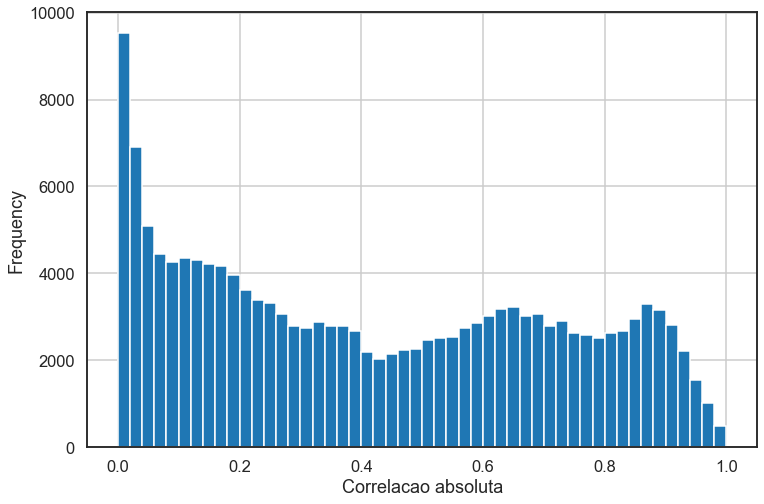

In [10]:
#Grafico para obter as correlacao absolutas

sns.set_context('talk')
sns.set_style('white')

ax = corr_values.abs_correlation.hist(bins=50, figsize=(12, 8))
ax.set(xlabel='Correlacao absoluta', ylabel='Frequency');

In [11]:
## Os valores mais altamente correlacionados
corr_values.sort_values('correlation', ascending=False).query('abs_correlation>0.8')

,feature1,feature2,correlation,abs_correlation
156894,fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-sma(),1.000000,1.000000
93902,tBodyAccMag-sma(),tGravityAccMag-sma(),1.000000,1.000000
101139,tBodyAccJerkMag-mean(),tBodyAccJerkMag-sma(),1.000000,1.000000
96706,tGravityAccMag-mean(),tGravityAccMag-sma(),1.000000,1.000000
94257,tBodyAccMag-energy(),tGravityAccMag-energy(),1.000000,1.000000
...,...,...,...,...
22657,tGravityAcc-mean()-Y,"angle(Y,gravityMean)",-0.993425,0.993425
39225,"tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4",-0.994267,0.994267
38739,"tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3",-0.994628,0.994628
23176,tGravityAcc-mean()-Z,"angle(Z,gravityMean)",-0.994764,0.994764


## Pergunta 3

* Divida os dados em conjuntos de dados de treinamento e teste. Isso pode ser feito usando qualquer método, mas considere usar o 'StratifiedShuffleSplit' do Scikit-learn para manter a mesma proporção de classes preditoras.
* Independentemente do método usado para dividir os dados, compare a proporção de classes nas divisões de trem e teste.

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

# Indices de divisão
strat_shuf_split = StratifiedShuffleSplit(n_splits=1, 
                                          test_size=0.3, 
                                          random_state=42)

train_idx, test_idx = next(strat_shuf_split.split(data[feature_cols], data.Activity))

# Crio o dataframe com a separacao de treino e teste
X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'Activity']

X_test  = data.loc[test_idx, feature_cols]
y_test  = data.loc[test_idx, 'Activity']

In [13]:
y_train.value_counts(normalize=True)

0    0.188792
2    0.185046
1    0.172562
3    0.167152
5    0.149951
4    0.136496
Name: Activity, dtype: float64

In [14]:
y_test.value_counts(normalize=True)

0    0.188673
2    0.185113
1    0.172492
3    0.167314
5    0.149838
4    0.136570
Name: Activity, dtype: float64

## Pergunta 4

* Ajuste um modelo de regressão logística sem qualquer regularização usando todos os recursos. Certifique-se de ler a documentação sobre como ajustar um modelo multiclasse para entender a saída do coeficiente. Guarde o modelo.Usando validação cruzada para determinar os hiperparâmetros e ajustar modelos usando regularização L1 e L2. Armazene cada um desses modelos também. Observe as limitações em modelos multiclasse, solvers e regularizações. Os modelos regularizados, em especial o modelo L1, provavelmente levarão um tempo para se encaixar.


In [ ]:
from sklearn.linear_model import LogisticRegression

# Regressão logística padrão
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

# Regressão logística regularizada L1
lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(X_train, y_train)

In [ ]:
##Regressão logística regularizada L2
lr_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='liblinear').fit(X_train, y_train)